# STOCK PRICE PREDICITION

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

### Importing Data

In [2]:
data=pd.read_csv('TSLA.csv')

In [3]:
data

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-06-29,19.000000,25.000000,17.540001,23.889999,23.889999,18766300
1,2010-06-30,25.790001,30.420000,23.299999,23.830000,23.830000,17187100
2,2010-07-01,25.000000,25.920000,20.270000,21.959999,21.959999,8218800
3,2010-07-02,23.000000,23.100000,18.709999,19.200001,19.200001,5139800
4,2010-07-06,20.000000,20.000000,15.830000,16.110001,16.110001,6866900
...,...,...,...,...,...,...,...
2411,2020-01-28,568.489990,576.809998,558.080017,566.900024,566.900024,11788500
2412,2020-01-29,575.690002,589.799988,567.429993,580.989990,580.989990,17801500
2413,2020-01-30,632.419983,650.880005,618.000000,640.809998,640.809998,29005700
2414,2020-01-31,640.000000,653.000000,632.520020,650.570007,650.570007,15719300


### Checking whether Both the columns are working

In [65]:
def man(x,y):
    ser=[0]*len(x)
    for i in range(len(x)):
        if x[i]==y[i]:
            ser[i]='True'
        else:
            ser[i]='False'
    return ser
print("Length:",len(data["Close"]))
r=man(data['Close'],data['Adj Close'])
d=pd.DataFrame(r)
print(d.value_counts())

Length: 2416
True    2416
Name: count, dtype: int64


### The Close and Adj Close are the same Values  so we either close any one.

In [72]:
data.describe()

,Open,High,Low,Close,Adj Close,Volume
count,2416.000000,2416.000000,2416.000000,2416.000000,2416.000000,2.416000e+03
mean,186.271147,189.578224,182.916639,186.403651,186.403651,5.572722e+06
std,118.740163,120.892329,116.857591,119.136020,119.136020,4.987809e+06
min,16.139999,16.629999,14.980000,15.800000,15.800000,1.185000e+05
25%,34.342498,34.897501,33.587501,34.400002,34.400002,1.899275e+06
50%,213.035004,216.745002,208.870002,212.960007,212.960007,4.578400e+06
75%,266.450012,270.927513,262.102501,266.774994,266.774994,7.361150e+06
max,673.690002,786.140015,673.520020,780.000000,780.000000,4.706500e+07


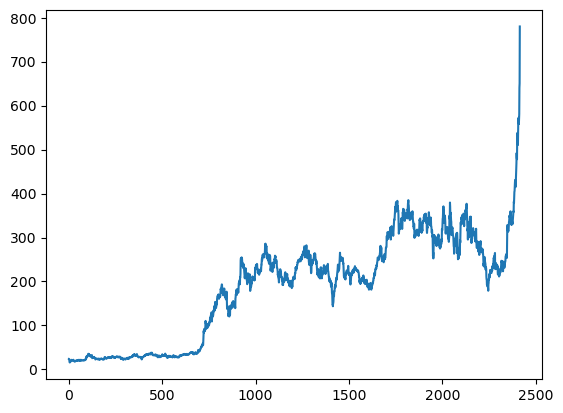

In [76]:
plt.plot(data['Adj Close'])

In [81]:
tsla=data['Close']
tsla

0        23.889999
1        23.830000
2        21.959999
3        19.200001
4        16.110001
           ...    
2411    566.900024
2412    580.989990
2413    640.809998
2414    650.570007
2415    780.000000
Name: Close, Length: 2416, dtype: float64

In [133]:
X = np.array(tsla.index).reshape(-1, 1)
y = tsla

0        23.889999
1        23.830000
2        21.959999
3        19.200001
4        16.110001
           ...    
2411    566.900024
2412    580.989990
2413    640.809998
2414    650.570007
2415    780.000000
Name: Close, Length: 2416, dtype: float64

In [86]:
from sklearn.model_selection import train_test_split

In [87]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [89]:
from sklearn.linear_model import LinearRegression

In [91]:
model = LinearRegression()

In [92]:
model.fit(X_train, y_train)

LinearRegression()

In [93]:
y_pred = model.predict(X_test)

In [98]:
y_pred

array([149.93416968,  87.45509808,  24.97602647, 295.20946821,
       244.49296021, 152.83662044,  35.21098441,  61.94408351,
       200.80343825, 278.25304536, 214.70464979, 163.68262065,
        64.235492  , 116.3268451 ,  13.0607023 , 331.10820129,
       114.34095774, 350.81431434,  91.12135167, 238.68805869,
       326.83090543, 273.21194667, 205.53901581, 292.30701745,
       312.77693334, 247.85369267, 365.021047  , 196.5261424 ,
       222.95372036, 171.77893066,  22.53185741,  94.32932356,
        84.24712618, 355.09161019, 366.70141323, 154.66974724,
       221.73163583, 132.213944  , 315.98490523, 187.51326899,
       266.03220005, 107.31397169,  26.198111  , 354.32780736,
        89.13546431, 236.54941076, 344.39837055,  96.46797149,
       329.58059563, 340.5793564 , 156.50287403, 262.6714676 ,
       106.55016886, 173.30653632, 336.91310281, 212.71876242,
        66.83242163, 155.89183177,   3.74230776, 110.52194358,
       237.31321359,  97.23177432, 195.609579  , 273.05

In [99]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 43.948209454045816
Mean Squared Error: 3048.4812844498083
Root Mean Squared Error: 55.213053569330945


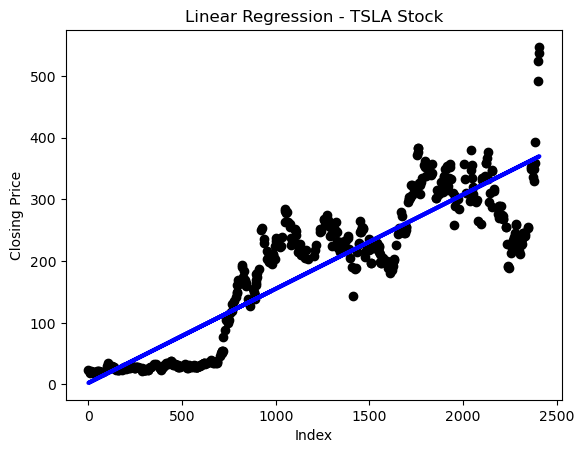

In [100]:
import matplotlib.pyplot as plt

# Plotting the results
plt.scatter(X_test, y_test, color='black')
plt.plot(X_test, y_pred, color='blue', linewidth=3)
plt.title('Linear Regression - TSLA Stock')
plt.xlabel('Index')
plt.ylabel('Closing Price')
plt.show()


In [115]:
model.predict([[1500]])

array([231.50831208])